In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

You should consider upgrading via the 'c:\users\lenovo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [35]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                        header = None, skipinitialspace=True)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' ,
                       skiprows = 1, delimiter=',', skipinitialspace=True, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
                'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [36]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [38]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [39]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [40]:
train_set = train_set[(train_set != '?').all(axis=1)]
test_set = test_set[(test_set != '?').all(axis=1)]

In [41]:
# Converting column to label format
train_set['wage_class'] = train_set['wage_class'].map({'<=50K': 0, '>50K': 1})
test_set['wage_class'] = test_set['wage_class'].map({'<=50K.': 0, '>50K.': 1})

<AxesSubplot:xlabel='native_country', ylabel='count'>

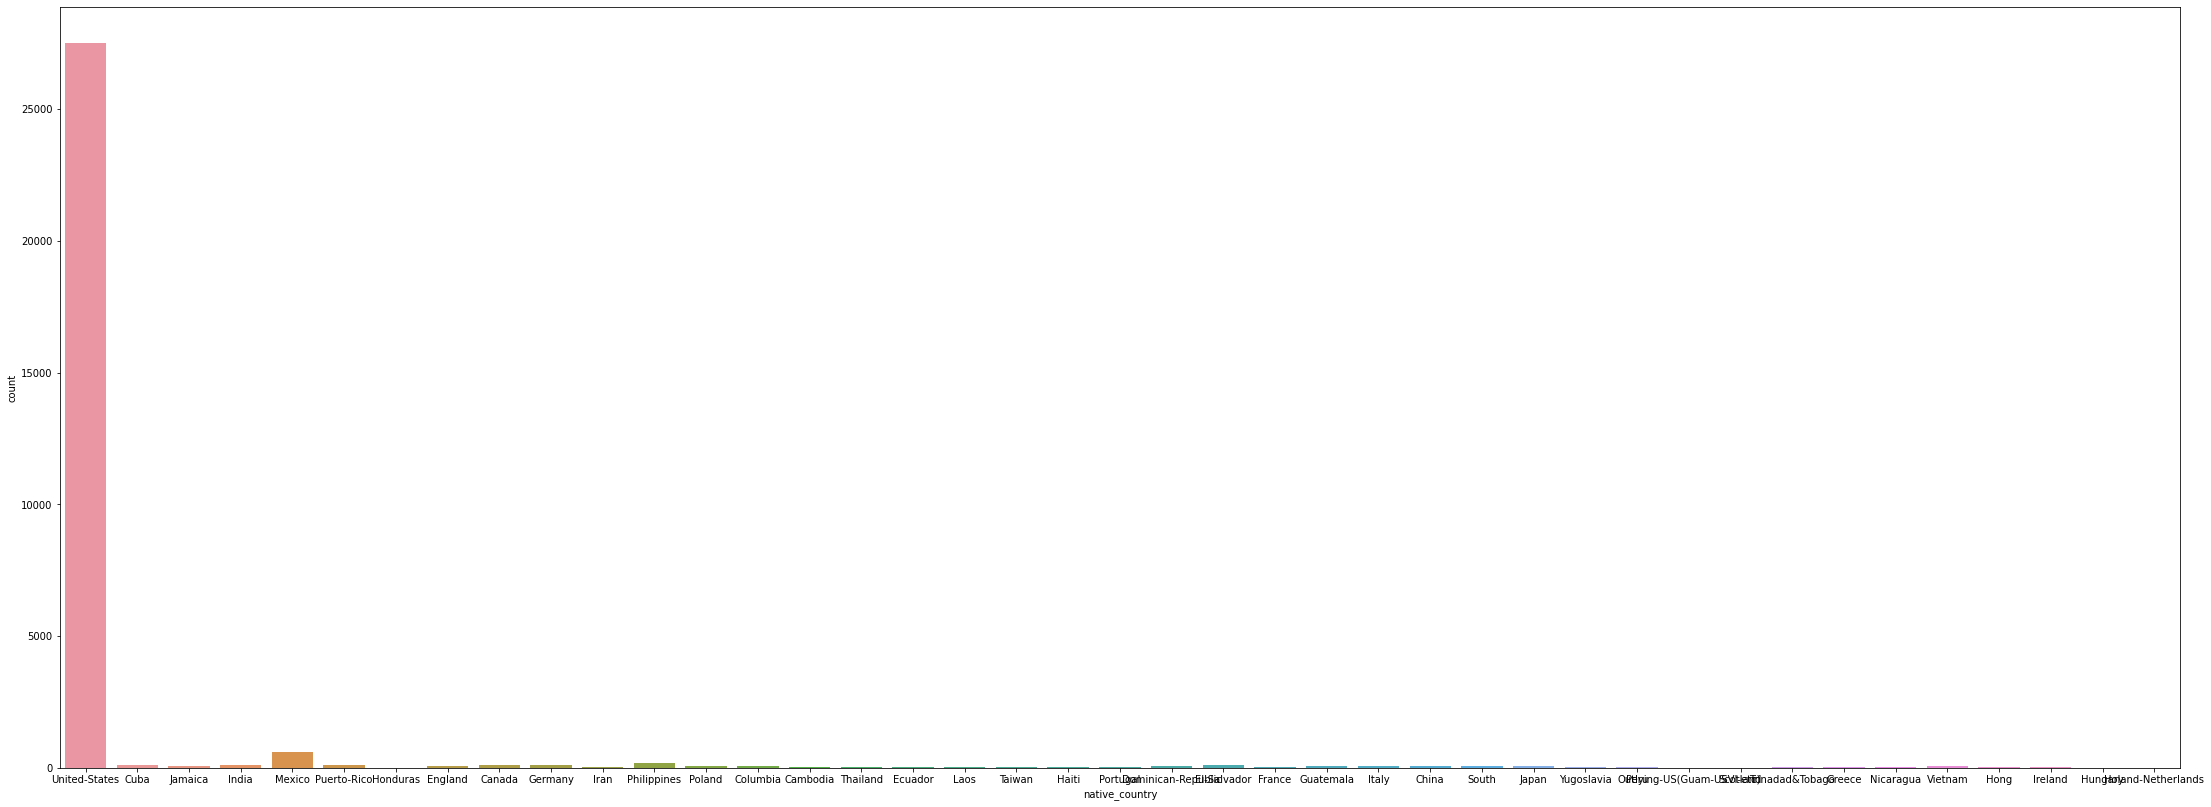

In [42]:
plt.figure(figsize=(38,14))
sns.countplot(x='native_country', data=train_set)

In [43]:
train_set.drop('native_country', axis=1, inplace=True)
test_set.drop('native_country', axis=1, inplace=True)
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0


<AxesSubplot:>

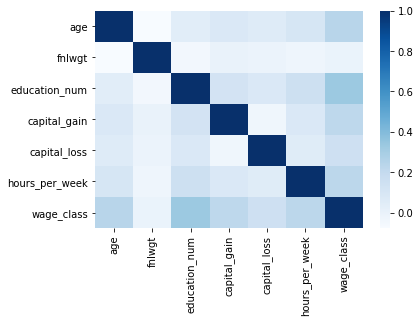

In [44]:
corr = train_set.corr()
sns.heatmap(corr, cmap='Blues')

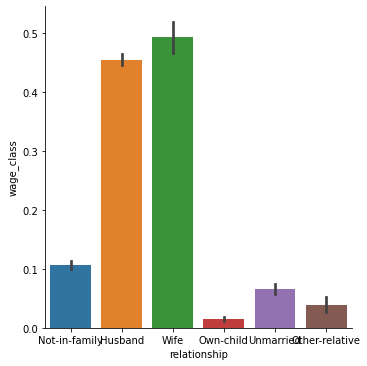

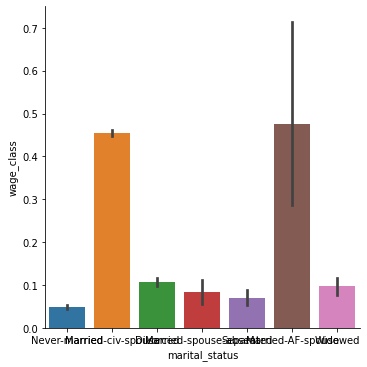

In [45]:
train_set.drop('education', axis=1, inplace=True)
test_set.drop('education', axis=1, inplace=True)

sns.catplot(x='relationship', y='wage_class', kind='bar', data=train_set)
sns.catplot(x='marital_status', y='wage_class', kind='bar', data=train_set)

In [48]:
train_set.drop(['workclass', 'race'], axis=1, inplace=True)
test_set.drop(['workclass', 'race'], axis=1, inplace=True)

In [49]:
train_set["marital_status"] = train_set["marital_status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
train_set["marital_status"] = train_set["marital_status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
train_set["marital_status"] = train_set["marital_status"].map({"Married":0, "Single":1})
train_set["marital_status"] = train_set["marital_status"]

In [50]:
test_set["marital_status"] = test_set["marital_status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
test_set["marital_status"] = test_set["marital_status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
test_set["marital_status"] = test_set["marital_status"].map({"Married":0, "Single":1})
test_set["marital_status"] = test_set["marital_status"]

In [51]:
onehotencoder = preprocessing.OneHotEncoder()
X = onehotencoder.fit_transform(train_set['sex'].values.reshape(-1,1)).toarray()
df = pd.DataFrame(X.astype(int), columns=['male', 'female'])
df.head()
train_set = pd.concat([train_set, df], axis=1)
train_set.drop(['sex'], axis=1, inplace=True)

In [52]:
X = onehotencoder.fit_transform(test_set['sex'].values.reshape(-1,1)).toarray()
df = pd.DataFrame(X.astype(int), columns=['male', 'female'])
df.head()
test_set = pd.concat([test_set, df], axis=1)
test_set.drop(['sex'], axis=1, inplace=True)

In [53]:
test_set.dropna(inplace=True)
train_set.dropna(inplace=True)

In [54]:
a = train_set['occupation'].unique()

In [55]:
X = onehotencoder.fit_transform(train_set['occupation'].values.reshape(-1,1)).toarray()
df = pd.DataFrame(X.astype(int), columns=a)
df.head()
train_set = pd.concat([train_set, df], axis=1)
train_set.drop(['occupation'], axis=1, inplace=True)

In [56]:
X = onehotencoder.fit_transform(test_set['occupation'].values.reshape(-1,1)).toarray()
df = pd.DataFrame(X.astype(int), columns=a)
df.head()
test_set = pd.concat([test_set, df], axis=1)
test_set.drop(['occupation'], axis=1, inplace=True)

In [57]:
y_train = train_set['wage_class']
x_train = train_set.drop('wage_class', axis=1)

y_test = test_set['wage_class']
x_test = test_set.drop('wage_class', axis=1)

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))